**Taller 5**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegFileWriter
from scipy.ndimage import generate_binary_structure
from scipy.ndimage import convolve
import pandas as pd
import re

Punto 1


In [ ]:
#TEMP

Punto 2

In [ ]:
#TEMP

Punto 3

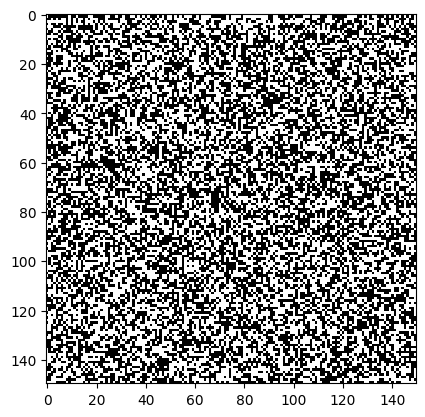

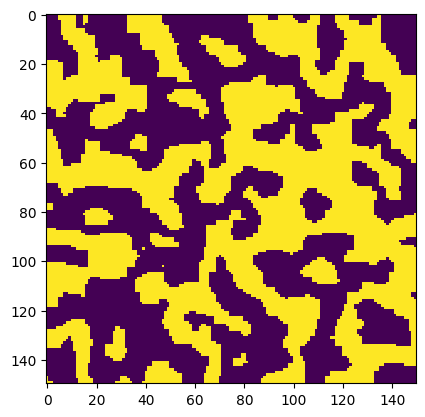

In [17]:
#Definir parametros
N = 150
J = 0.2
beta = 10

#Definir estado inicial del sistema
estado0 = np.random.randint(2, size=(N, N))
for i in range(len(estado0)):
    for j in range(len(estado0[i])):
        if estado0[i][j] == 0:
            estado0[i][j] = -1
#Muy ineficiente, solo prueba concepto, cambiar

#Calcular energia originial
def energia(array, J):
    kernel = generate_binary_structure(2, 1)
    kernel[1][1] = False
    resultado = -J * array * convolve(array, kernel, mode="constant", cval=0)
    return resultado.sum()

#Inicializar gráfico
metadata = dict(title="Muestra Solucíon Animada", artist="Yo")
writer = FFMpegFileWriter(fps=15, metadata=metadata)

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(estado0, cmap="Greys",  interpolation="nearest")
plt.show()

def fun(estado0, J):
    for i in range(400000):
        #Calular energia inical
        Eo = energia(estado0, J)

        #Sacar posición aleatoria en el array
        rand = np.random.randint(N, size=(2))

        #Cambiar el valor de la posición
        estado1 = estado0.copy()
        estado1[rand[0], rand[1]] *= -1

        #Calcular la energia nueva
        En = energia(estado1, J)

        #Aplicar condiciones
        dE = En - Eo

        if dE <= 0 or np.random.random() < np.exp(-beta * dE):
            estado0 = estado1
    return estado1

plt.imshow(fun(estado0=estado0, J=J), interpolation="nearest")
plt.show()


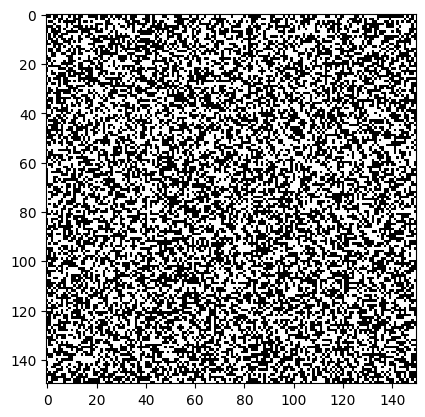

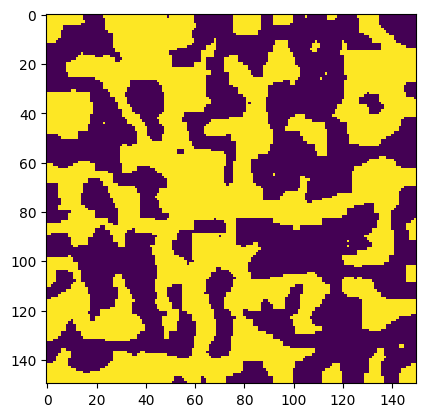

In [18]:
#Definir parametros
N = 150
J = 0.2
beta = 10

#Definir estado inicial del sistema
estado0 = np.random.randint(2, size=(N, N))
for i in range(len(estado0)):
    for j in range(len(estado0[i])):
        if estado0[i][j] == 0:
            estado0[i][j] = -1
#Muy ineficiente, solo prueba concepto, cambiar
plt.imshow(estado0, cmap="Greys",  interpolation="nearest")
plt.show()
#Calcular energia originial

def energia(array, J):
    kernel = generate_binary_structure(2, 1)
    kernel[1][1] = False
    resultado = -J * array * convolve(array, kernel, mode="constant", cval=0)
    return resultado.sum()

#Inicializar gráfico
metadata = dict(title="Muestra Solucíon Animada", artist="Yo")
writer = FFMpegFileWriter(fps=5, metadata=metadata)

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(estado0, cmap="Greys",  interpolation="nearest")

with writer.saving(fig, "Modelo Ising con Metropolis.mp4", 200):
    for i in range(400000):
        #Calular energia inical
        Eo = energia(estado0, J)

        #Sacar posición aleatoria en el array
        rand = np.random.randint(N, size=(2))

        #Cambiar el valor de la posición
        estado1 = estado0.copy()
        estado1[rand[0], rand[1]] *= -1

        #Calcular la energia nueva
        En = energia(estado1, J)

        #Aplicar condiciones
        dE = En - Eo

        if dE <= 0 or np.random.random() < np.exp(-beta * dE):
            estado0 = estado1

        if i % 10000 == 0:
            ax.imshow(estado1, interpolation="nearest")
            writer.grab_frame()


**AVISO**
Debido a problemas de compatibilidad, La animación se subio al repositorio como un archivo separado. Por favor dirigirse al archivo "Modelo Ising con Metropolis.mp4" para ver la animación correspondiente a este punto.

Punto 4

*4.1*

In [2]:
#Importar el Libro
with open("Alice in Wonderland.txt", "r", encoding="utf-8") as file:
    libro = file.read()

In [26]:
#Limpiar el libro
import re
libro_limpio = libro.replace("\r\n", "\n").replace("\n\n", "#").replace("\n", " ").replace("#", "\n\n")
libro_limpio = re.sub(r"[^\w\s.,;:?!\n]", "", libro_limpio)
libro_limpio = re.sub(r" {2,}", " ", libro_limpio)
libro_limpio = re.sub(r"ù", "u", libro_limpio)
libro_limpio = re.sub(r"_", "", libro_limpio)
libro_limpio = libro_limpio.lower()
#Quite la primera y ultima parte del libro a mano

print(libro_limpio[:500])

chapter i. down the rabbithole

 alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, and what is the use of a book, thought alice without pictures or conversations?

so she was considering in her own mind as well as she could, for the hot day made her feel very sleepy and stupid, whether the pleasure of making a daisychain would be


*4.2*

In [27]:
np.unique(list(libro_limpio))

array(['\n', ' ', '!', ',', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e',
       'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
       's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype='<U1')

In [43]:
n=3
np.unique([libro_limpio[i:i+n] for i in range(len(libro_limpio)-n)]) #Me da las combinaciones unicas de n caracteres

array(['\n\n\n', '\n\n ', '\n\na', ..., 'zy ', 'zy!', 'zzl'], dtype='<U3')

In [89]:
#Parametros
n = 3
caracteres = sorted(set("abcdefghijklmnopqrstuvwxyz .,;:?!\n"))
unicos = np.unique([libro_limpio[i:i+n] for i in range(len(libro_limpio)-n)]) #Me da las combinaciones unicas de n caracteres
ngramas = []
for i in unicos:
    ngramas.append(str(i))
#print(ngramas)

#Creando DataFrame
F = pd.DataFrame(np.zeros((len(ngramas), len(caracteres)), dtype=int), index=ngramas, columns=caracteres)

for i in range(len(libro_limpio) - n):
    posicion = libro_limpio[i:i+n]
    posicion_sig = libro_limpio[i+n]
    #if posicion in ngramas and posicion_sig in caracteres:
    #print(posicion, posicion_sig)
    F.loc[posicion, posicion_sig] += 1









P = F / F.sum(axis=1).values[:,None]

display(P)

['\n\n\n', '\n\n ', '\n\na', '\n\nb', '\n\nc', '\n\nd', '\n\ne', '\n\nf', '\n\ng', '\n\nh', '\n\ni', '\n\nj', '\n\nk', '\n\nl', '\n\nm', '\n\nn', '\n\no', '\n\np', '\n\nr', '\n\ns', '\n\nt', '\n\nu', '\n\nv', '\n\nw', '\n\ny', '\n \n', '\n a', '\n b', '\n c', '\n f', '\n h', '\n i', '\n t', '\n w', '\n y', '\na ', '\naf', '\nah', '\nal', '\nan', '\nar', '\nas', '\nat', '\nba', '\nbe', '\nbo', '\nbu', '\nby', '\nca', '\nce', '\nch', '\nco', '\ndi', '\ndo', '\nea', '\nei', '\nev', '\nex', '\nfi', '\nfo', '\nge', '\ngi', '\ngo', '\nha', '\nhe', '\nho', '\nhu', '\ni ', '\nid', '\nif', '\nii', '\nil', '\nim', '\nin', '\nis', '\nit', '\niv', '\nju', '\nke', '\nla', '\nle', '\nlu', '\nma', '\nmi', '\nmy', '\nne', '\nno', '\nof', '\noh', '\non', '\nor', '\npe', '\npl', '\npo', '\npr', '\nre', '\nri', '\nse', '\nsh', '\nsi', '\nso', '\nsp', '\nst', '\nsu', '\nsw', '\nta', '\nte', '\nth', '\nti', '\nto', '\ntr', '\ntu', '\ntw', '\nug', '\nun', '\nup', '\nve', '\nwa', '\nwe', '\nwh', '\nwi', '\nw

,\n,,!,",",.,:,;,?,a,b,...,q,r,s,t,u,v,w,x,y,z
\n\n\n,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
\n\n,0.169811,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.056604,0.018868,...,0.0,0.000000,0.000000,0.169811,0.000000,0.0,0.09434,0.0,0.037736,0.0
\n\na,0.000000,0.067961,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.038835,0.087379,0.048544,0.000000,0.0,0.00000,0.0,0.000000,0.0
\n\nb,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.000000,...,0.0,0.000000,0.000000,0.000000,0.619048,0.0,0.00000,0.0,0.142857,0.0
\n\nc,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zle,0.000000,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
zli,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
zy,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
zy!,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
